In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
np.set_printoptions(suppress=True)

AVG_EMD_BASELINE_EoL = 1.346362954366226

In [29]:
def parse_ranking_file(file):
    """
    Parse the ranking file which contains a list of (bit index, ranking val) 
    into a list of bit indices and a list of ranking values
    """
    bit_indices = []
    vals = []
    with open(file, 'r') as f:
        for i, line in enumerate(f):
            if i == 0:
                # Skip the header
                continue
            line = line.strip()
            if line:
                bit_idx, val = line.split(',')
                bit_indices.append(bit_idx)
                vals.append(float(val))
    return bit_indices, vals

In [30]:
ground_truth_rank, ground_truth_emd = parse_ranking_file('encoder_param_ranking_ground_truth.txt')

In [31]:
len(ground_truth_emd)

10600

In [32]:
# Get top 10% highest ranking bits
top_10pct = int(len(ground_truth_rank) * 0.1)
top_10pct_bit_indices = ground_truth_rank[:top_10pct]
top_10pct_emd = ground_truth_emd[:top_10pct]

In [33]:
top_10pct_emd[:10]

[2.3896244681934165,
 2.055341134796515,
 1.977777681572585,
 1.961741187858911,
 1.8845759970468594,
 1.8474087329590083,
 1.7998147736668484,
 1.7980255116348676,
 1.7745019090332985,
 1.7613198617854502]

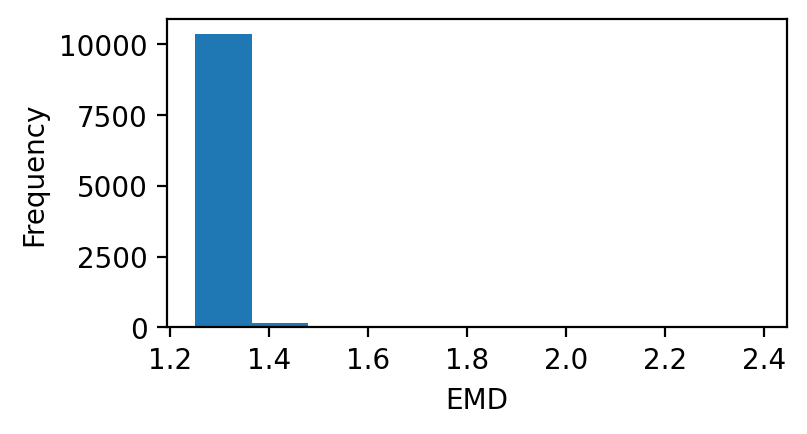

In [42]:
# Plot histogram of the EMD values
fig, ax = plt.subplots(figsize=(4,2)) # Sample figsize in inches
ax.hist(ground_truth_emd)
ax.set_xlabel('EMD')
ax.set_ylabel('Frequency')
plt.savefig('plots/histogram_faulty_emd.pdf', dpi=300, bbox_inches='tight')

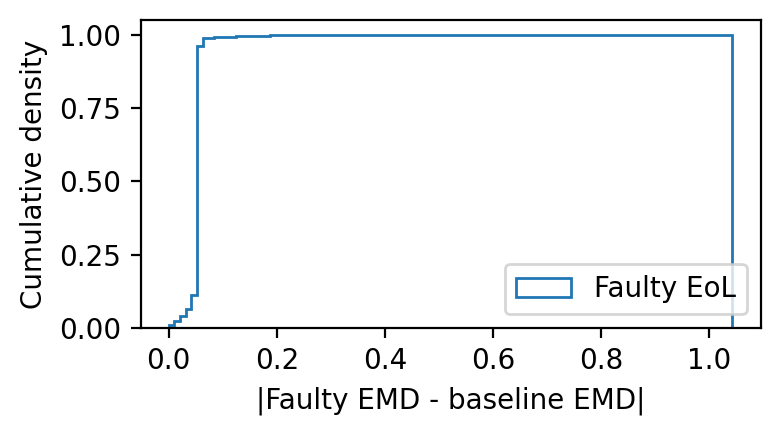

In [45]:
# Plot histogram of the delta EMD values from the baseline
fig, ax = plt.subplots(figsize=(4,2)) # Sample figsize in inches
ax.hist(np.absolute(np.array(ground_truth_emd) - AVG_EMD_BASELINE_EoL), cumulative=True, density=True, bins=100, histtype='step', label='Faulty EoL')
ax.set_xlabel('|Faulty EMD - baseline EMD|')
ax.set_ylabel('Cumulative density')
ax.legend(loc='lower right')
plt.savefig('plots/histogram_faulty_delta_emd.pdf', dpi=300, bbox_inches='tight')